In [1]:
#导入需要的工具包

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#导入预处理后的数据集

processed_df = pd.read_csv('processed_heart.csv')
processed_df.head()

,age,resting_blood_pressure,serum_cholestoral,maximum_heart_rate,st_depression,number_major_vessels,target,sex_female,sex_male,chest_pain_type_asymptomatic,...,resting_ele_normal,exercise_induced_angina_no,exercise_induced_angina_yes,st_slope_downsloping,st_slope_flat,st_slope_upsloping,thalassemia_fix defect,thalassemia_normal,thalassemia_reversable defect,thalassemia_unkonwn
0,63,145,233,150,2.3,0,1,0,1,1,...,1,1,0,0,0,1,0,1,0,0
1,37,130,250,187,3.5,0,1,0,1,0,...,0,1,0,0,0,1,1,0,0,0
2,41,130,204,172,1.4,0,1,1,0,0,...,1,1,0,1,0,0,1,0,0,0
3,56,120,236,178,0.8,0,1,0,1,0,...,0,1,0,1,0,0,1,0,0,0
4,57,120,354,163,0.6,0,1,1,0,0,...,0,0,1,1,0,0,1,0,0,0


In [4]:
#切分数据集

X = processed_df.drop('target',axis  = 1)
y = processed_df['target']

#将数据集切分为测试集和训练集
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 0)

print('训练特征的大小:',X_train.shape)
print('训练标签的大小:',y_train.shape)
print('测试特征的大小:',X_test.shape)
print('测试标签的大小:',y_test.shape)

训练特征的大小: (212, 26)
训练标签的大小: (212,)
测试特征的大小: (91, 26)
测试标签的大小: (91,)


In [5]:
#建立随机森林模型

from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators = 100,max_depth = 5,random_state = 0)
RF.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [10]:
#从测试集中选择一个数据进行测试

test_sample = X_test.iloc[5].values

In [11]:
test_sample = test_sample.reshape(1,-1)

In [12]:
predict_result = RF.predict(test_sample)
print('模型的预测结果:',predict_result)
print('该样本的真实结果:',y_train.iloc[5])

模型的预测结果: [0]
该样本的真实结果: 0


In [13]:
#模型的定量预测结果
RF.predict_proba(test_sample)

array([[0.55777398, 0.44222602]])

In [14]:
#模型在测试集上的定性预测结果
RF.predict(X_test)

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0], dtype=int64)

In [15]:
#模型在测试集上的定量预测结果
RF.predict_proba(X_test)

array([[0.74389287, 0.25610713],
       [0.40255383, 0.59744617],
       [0.43306131, 0.56693869],
       [0.98096444, 0.01903556],
       [0.7919676 , 0.2080324 ],
       [0.55777398, 0.44222602],
       [0.78280153, 0.21719847],
       [0.90032869, 0.09967131],
       [0.96922812, 0.03077188],
       [0.94651037, 0.05348963],
       [0.43040398, 0.56959602],
       [0.05069312, 0.94930688],
       [0.91825507, 0.08174493],
       [0.07465252, 0.92534748],
       [0.06725272, 0.93274728],
       [0.33063348, 0.66936652],
       [0.72564842, 0.27435158],
       [0.15415977, 0.84584023],
       [0.93082891, 0.06917109],
       [0.37546538, 0.62453462],
       [0.09555627, 0.90444373],
       [0.66680159, 0.33319841],
       [0.67943042, 0.32056958],
       [0.68677184, 0.31322816],
       [0.19439952, 0.80560048],
       [0.53830654, 0.46169346],
       [0.7080598 , 0.2919402 ],
       [0.61531975, 0.38468025],
       [0.04776584, 0.95223416],
       [0.16598493, 0.83401507],
       [0.

In [18]:
np.where(RF.predict_proba(X_test)[:,0] > 0.5,0,1)

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0])

In [20]:
y_pred = RF.predict(X_test)
y_pred_proba = RF.predict_proba(X_test)

### 1.混淆矩阵

sklearn中的metrics模块提供了丰富的模型评估指标，如precison,recall,f1-score,mean_squared_error等。

In [24]:
from sklearn.metrics import confusion_matrix

cf = confusion_matrix(y_test,y_pred,labels = [0,1])
cf

array([[32, 12],
       [ 4, 43]], dtype=int64)

In [25]:
#可视化混淆矩阵

import itertools
def cnf_matrix_plotter(cm, classes):
    """
    传入混淆矩阵和标签名称列表，绘制混淆矩阵
    """
    # plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Greens)
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Oranges)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    threshold = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > threshold else "black",
                 fontsize=25)

    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

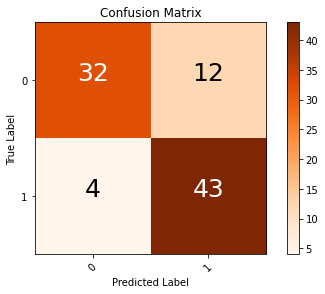

In [26]:
cnf_matrix_plotter(cf,[0,1])

In [27]:
confusion_matrix?

In [28]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print(tn,fp,fn,tp)

32 12 4 43


In [29]:
from sklearn.metrics import precision_score

precision_score(y_test,y_pred)

0.7818181818181819

In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred,target_names = ['Healthy','Disease']))

              precision    recall  f1-score   support

     Healthy       0.89      0.73      0.80        44
     Disease       0.78      0.91      0.84        47

   micro avg       0.82      0.82      0.82        91
   macro avg       0.84      0.82      0.82        91
weighted avg       0.83      0.82      0.82        91



### 2.ROC曲线

In [37]:
from sklearn.metrics import roc_curve,auc,roc_auc_score

In [38]:
roc_auc_score(y_test,y_pred)

0.8210831721470019

In [39]:
y_pred_quant = y_pred_proba[:,1]

fpr,tpr,thresholds = roc_curve(y_test,y_pred_quant)

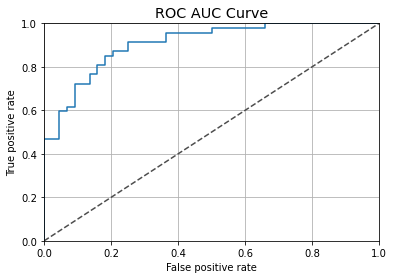

In [41]:
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],ls = '--',c = '.3')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC AUC Curve')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.grid(True)

### 3.绘制Permutatio importance图

In [44]:
import eli5
from eli5.sklearn import PermutationImportance

per = PermutationImportance(RF,random_state = 1).fit(X_test,y_test)
eli5.show_weights(per,feature_names = X_test.columns.tolist())

Weight,Feature
0.0527 ± 0.0378,number_major_vessels
0.0352 ± 0.0323,chest_pain_type_typical angina
0.0308 ± 0.0256,thalassemia_fix defect
0.0220 ± 0.0197,st_slope_downsloping
0.0176 ± 0.0176,thalassemia_reversable defect
0.0154 ± 0.0108,st_slope_flat
0.0088 ± 0.0323,serum_cholestoral
0.0066 ± 0.0108,age
0.0044 ± 0.0108,resting_ele_normal
0.0044 ± 0.0108,exercise_induced_angina_no
